HW5_Q7_Omid_Jafaei_401204268

# SVM

In this exercise, we see Support Vector Machine (SVM) with various kernel functions.  

We use Scikit-learn, a Python package of machine learning methods. We are using a toy binary classification example to understand Linear SVM, and then see feature expansion and kernel functions to extend it to non-linearly separable data.

helper functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

def plotC(fracts, nDims, trials):
    plt.figure()
    domain = np.round(np.linspace(2,200,25)).astype(int)/nDims
    plt.plot(domain,fracts)
    plt.xlabel("p/N")
    plt.ylabel("C(p,N)")
    plt.title("Fraction of convergences per {} trials as a function of p".format(trials))

def plot3Dscatter(X):
    prefix = "original" if X.shape[1]<3 else "transformed"
    if X.shape[1]<3:
        Z = np.zeros((X.shape[0],1))
        X = np.hstack([X, Z])
        
    fig = plt.figure()
    ax  = Axes3D(fig)
    point_size = 1000
    colors_vec = ["red","blue","blue","red"]
    ax.scatter(list(X[:,0]), list(X[:,1]), list(X[:,2]), s=point_size, c=colors_vec)
    ax.set_zlim3d(0,2)

    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_zlabel("z")
    plt.title("XOR problem {} data points".format(prefix))
    
def expand_X(X, degree_of_expansion):
    """  Perform degree-d polynomial feature expansion of X, 
        with bias but omitting interaction terms
    
    Args:
        X (np.array): data, shape (N, D).
        degree_of_expansion (int): The degree of the polynomial feature expansion.
    
    Returns:
        (np.array): Expanded data with shape (N, new_D), 
                    where new_D is D*degree_of_expansion+1
    
    """
   
    expanded_X = np.ones((X.shape[0],1))
    for idx in range(1,degree_of_expansion+1): 
        expanded_X = np.hstack((expanded_X, X**idx))
    return expanded_X

def expand_X_poly(X, degree_of_expansion):
    """  Perform degree-d polynomial feature expansion of X, 
         with bias but omitting interaction terms
    
    Args:
        X (np.array): data, shape (N, D).
        degree_of_expansion (int): The degree of the polynomial feature expansion.
    
    Returns:
        (np.array): Expanded data with shape (N, new_D), 
                    where new_D is D*degree_of_expansion+1
    
    """
    expanded_X = np.ones((X.shape[0],1))
    ### CODE HERE ###
#     for idx in range(1,degree_of_expansion+1): 
#         expanded_X = np.hstack((expanded_X, X**idx))
    poly = PolynomialFeatures(degree_of_expansion)
    expanded_X = poly.fit_transform(X)
    
    return expanded_X


'''Plotting helper for SVM exercise'''
def plot(X,Y,clf,show=True,dataOnly=False):
    
    plt.figure()
    # plot data points
    Y = Y.copy()
    Y[Y==-1] = 0
    X1 = X[Y==0]
    X2 = X[Y==1]
    Y1 = Y[Y==0]
    Y2 = Y[Y==1]
    class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, color="C0",
                edgecolor='k', s=20)
    class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, color="C1",
                edgecolor='k', s=20)
    if not dataOnly:
        # get the range of data
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        # sample the data space
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

        # apply the model for each point
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)

        # plot the partitioned space
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
        
        # plot hyperplanes
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                    linestyles=['--', '-', '--'], levels=[-1, 0, 1], alpha=0.5)
        
        # plot support vectors
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                edgecolors='g', facecolors='g', s=100, linewidth=1)
    if dataOnly:
        plt.title('Data Set')
    else:
        if clf.kernel == 'rbf':
            plt.title('Decision Boundary and Margins, C={}, gamma={} with {} kernel'.format(clf.C,clf.gamma, clf.kernel)) 
        elif clf.kernel == 'poly':
            plt.title('Decision Boundary and Margins, C={}, degree={} with {} kernel'.format(clf.C,clf.degree, clf.kernel)) 
        else:
            plt.title('Decision Boundary and Margins, C={} with {} kernel'.format(clf.C, clf.kernel)) 
        
    plt.legend((class1,class2),('Class A','Class B'),scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
    if show:
        plt.show()
        
'''Plotting helper for SVM exercise'''
def plot_expand_poly(X,Y,clf, degree=2, show=True,dataOnly=False):
    
    plt.figure()
    # plot data points
    X1 = X[Y==0]
    X2 = X[Y==1]
    Y1 = Y[Y==0]
    Y2 = Y[Y==1]
    class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, color="C0",
                edgecolor='k', s=20)
    class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, color="C1",
                edgecolor='k', s=20)
    if not dataOnly:
        # get the range of data
        x_min = X[:, 0].min() 
        x_max = X[:, 0].max() 
        y_min = X[:, 1].min() 
        y_max = X[:, 1].max() 

        # sample the data space
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        
        # apply the model for each point
        Z = clf.decision_function(expand_X_poly(np.c_[XX.ravel(), YY.ravel()], degree))
        Z = Z.reshape(XX.shape)

        # plot the partitioned space
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
        
        # plot hyperplanes
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                    linestyles=['--', '-', '--'], levels=[-1, 0, 1], alpha=0.5)
        
        # plot support vectors
        plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2],
                edgecolors='g', facecolors='g', s=100, linewidth=1)
    if dataOnly:
        plt.title('Data Set')
    else:
        if clf.kernel == 'rbf':
            plt.title('Decision Boundary and Margins, C={}, gamma={} with {} kernel'.format(clf.C,clf.gamma, clf.kernel)) 
        elif clf.kernel == 'poly':
            plt.title('Decision Boundary and Margins, C={}, degree={} with {} kernel'.format(clf.C,clf.degree, clf.kernel)) 
        elif clf.kernel == 'linear':
            plt.title('Decision Boundary and Margins, C={}, degree={} on expanded data'.format(clf.C, degree))
        else:
            plt.title('Decision Boundary and Margins, C={} with {} kernel'.format(clf.C, clf.kernel)) 
        
    plt.legend((class1,class2),('Class A','Class B'),scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
    if show:
        plt.show()
        
def plot_expand(X,Y,clf, degree=2, show=True,dataOnly=False):
    
    plt.figure()
    # plot data points
    X1 = X[Y==0]
    X2 = X[Y==1]
    Y1 = Y[Y==0]
    Y2 = Y[Y==1]
    class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, color="C0",
                edgecolor='k', s=20)
    class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, color="C1",
                edgecolor='k', s=20)
    if not dataOnly:
        # get the range of data
        x_min = X[:, 0].min() 
        x_max = X[:, 0].max() 
        y_min = X[:, 1].min() 
        y_max = X[:, 1].max() 

        # sample the data space
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        
        # apply the model for each point
        Z = clf.decision_function(expand_X(np.c_[XX.ravel(), YY.ravel()], degree))
        Z = Z.reshape(XX.shape)

        # plot the partitioned space
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
        
        # plot hyperplanes
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                    linestyles=['--', '-', '--'], levels=[-1, 0, 1], alpha=0.5)
        
        # plot support vectors
        plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2],
                edgecolors='g', facecolors='g', s=100, linewidth=1)
    if dataOnly:
        plt.title('Data Set')
    else:
        if clf.kernel == 'rbf':
            plt.title('Decision Boundary and Margins, C={}, gamma={} with {} kernel'.format(clf.C,clf.gamma, clf.kernel)) 
        elif clf.kernel == 'poly':
            plt.title('Decision Boundary and Margins, C={}, degree={} with {} kernel'.format(clf.C,clf.degree, clf.kernel))
        elif clf.kernel == 'linear':
            plt.title('Decision Boundary and Margins, C={}, degree={} on expanded data'.format(clf.C, degree))
        else:
            plt.title('Decision Boundary and Margins, C={} with {} kernel'.format(clf.C, clf.kernel)) 
        
    plt.legend((class1,class2),('Class A','Class B'),scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
    if show:
        plt.show()
        
def plot_mykernel(X,Y,clf,show=True,dataOnly=False):
    
    plt.figure()
    # plot data points
    X1 = X[Y==0]
    X2 = X[Y==1]
    Y1 = Y[Y==0]
    Y2 = Y[Y==1]
    class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, color="C0",
                edgecolor='k', s=20)
    class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, color="C1",
                edgecolor='k', s=20)
    if not dataOnly:
        # get the range of data
        x_min = X[:, 0].min() 
        x_max = X[:, 0].max() 
        y_min = X[:, 1].min() 
        y_max = X[:, 1].max() 

        # sample the data space
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

        # apply the model for each point
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)

        # plot the partitioned space
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
        
        # plot hyperplanes
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                    linestyles=['--', '-', '--'], levels=[-1, 0, 1], alpha=0.5)
        
        # plot support vectors
        plt.scatter(X[clf.support_][:, 0], X[clf.support_][:, 1],
                edgecolors='g', facecolors='g', s=100, linewidth=1)
    if dataOnly:
        plt.title('Data Set')
    else:
        if clf.kernel == 'rbf':
            plt.title('Decision Boundary and Margins, C={}, gamma={} with {} kernel'.format(clf.C,clf.gamma, clf.kernel)) 
        elif clf.kernel == 'poly':
            plt.title('Decision Boundary and Margins, C={}, degree={} with {} kernel'.format(clf.C,clf.degree, clf.kernel)) 
        else:
            plt.title('Decision Boundary and Margins, C={} with {} kernel'.format(clf.C, 'my_poly')) 
        
    plt.legend((class1,class2),('Class A','Class B'),scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
    if show:
        plt.show()
   
'''Plotting Heatmap for CV results'''
def plot_cv_result_rbf(grid_val,grid_search_c,grid_search_gamma):
    plt.figure(figsize=(8,10))
    plt.imshow(grid_val)
    plt.colorbar()
    plt.xticks(np.arange(len(grid_search_gamma)), grid_search_gamma, rotation=20)
    plt.yticks(np.arange(len(grid_search_c)), grid_search_c, rotation=20)
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.title('Val Accuracy for different Gammas and Cs')
    plt.show()

def plot_cv_result_poly(grid_val,grid_search_c,grid_search_degree):
    plt.figure(figsize=(8,10))
    plt.imshow(grid_val)
    plt.colorbar()
    plt.xticks(np.arange(len(grid_search_degree)), grid_search_degree, rotation=20)
    plt.yticks(np.arange(len(grid_search_c)), grid_search_c, rotation=20)
    plt.xlabel('Degree')
    plt.ylabel('C')
    plt.title('Val Accuracy for different Degrees and Cs')
    plt.show()


def plot_simple_data():
    #Data set
    x_neg = np.array([[2,4],[1,4],[2,3]])
    y_neg = np.array([-1,-1,-1])
    x_pos = np.array([[6,-1],[7,-1],[5,-3]])
    y_pos = np.array([1,1,1])
    x1 = np.linspace(-10,10)
    x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

    #Parameters guessed by inspection
    w = np.array([1,-1]).reshape(-1,1)
    b = -3

    #Plot
    fig = plt.figure(figsize = (6,6))
    plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
    plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
    plt.plot(x1, x1  - 3, color = 'darkblue')
    plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
    plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
    plt.xlim(0,10)
    plt.ylim(-5,5)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(-5, 5, step=1))

    #Lines
    plt.axvline(0, color = 'black', alpha = .5)
    plt.axhline(0,color = 'black', alpha = .5)
    plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
    plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )
    plt.plot([0,1.5],[0,-1.5],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

    #Annotations
    plt.annotate('$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
    plt.annotate('$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
    plt.annotate('$2$', xy = (5,1.2), xytext = (5,1.2) )
    plt.annotate('$2$', xy = (6.2,.5), xytext = (6.2,.5))
    plt.annotate('$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
    plt.annotate('$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
    plt.annotate('$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
    plt.annotate('$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))
    plt.annotate('$\\frac{3}{\sqrt{2}}$', xy = (.5,-1), xytext = (.5,-1))

    #Labels and show
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend(loc = 'lower right')
    plt.show()

In [2]:
import numpy as np
from sklearn import datasets


# helper for SVM exercise

''' Gives a simple toy dataset.'''
def get_simple_dataset():
    # create a toy dataset
    np.random.seed(1)
    X, Y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
    return X,Y

'''Gives two circluar dataset'''
def get_circle_dataset():
    np.random.seed(0)
    X,Y = datasets.make_circles(n_samples=100, factor=.5,
                                      noise=.05)
    return X,Y

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

# 1 Scikit-Learn

Training an SVM classifer is not a easy task, so in this session, we are going to use Scikit-Learn, which is a machine learning library for Python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize a SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

This package `sklearn` should already be implemented in your conda enviornment. If it's not the case, type the following command in your terminal:
```
conda install -y -c conda-forge sklearn
```

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for a simple example.

We will explore SVM for classification in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). We will start here with the linear kernel.

In [4]:
# We import the SVM classifier class from scikit-learn.
from sklearn.svm import SVC

# 2 Linear SVM

SVM tries to solve linear classification problem of this form:

$$
\begin{align}
    \mathbf{w}^* = \underset{\mathbf{w},\{\xi_n\}}{\operatorname{argmin}}  \ \ & \frac{1}{2}\|\mathbf{w}\|^2 + C \sum^N_{n=1}\xi_n \\
    \operatorname{subject \  to} \ \ &  t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) \geq 1-\xi_n , \forall n \\
                        &\text{and  }\  \xi_n \geq 0 , \forall n
\end{align}
$$
where, $\tilde{\mathbf{w}}$ are the weights with bias term, $x_n$ is a data sample and $t_n$ is a label.

**Q.** Why do we minimize $\|\mathbf{w}\|$ ? 

**A.** Because we want to maximize the margin and the margin is inversely related to $\|\mathbf{w}\|$ .

**Q.** What is C? How should we choose the best value for C?

**A.** C is a hyperparameter. Hard SVM requires large C values and soft SVM requires small C values. We choose best value of C by cross validation.
    
**Q.** What does it mean when $\xi_i \gt 0$ ?

**A.** $\xi_i $ is distance from seperation line. So distance must be positive value.


## 2.1 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simply **linearly** separable.

We visualize here the optimal maximum-margin solution without misclassifications.

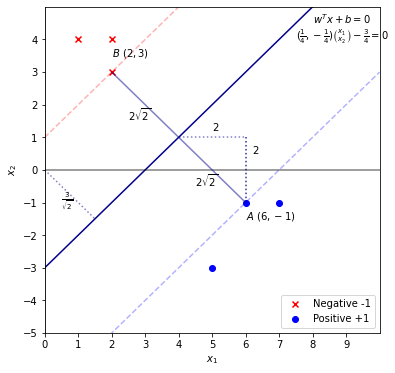

In [5]:
# Simple data with 3 points per class
X = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
Y = np.array([-1, -1, -1, 1, 1, 1])
plot_simple_data()

In this part, you are asked to build a SVM classifier using SVC and to understand the outputs from the fitted model.

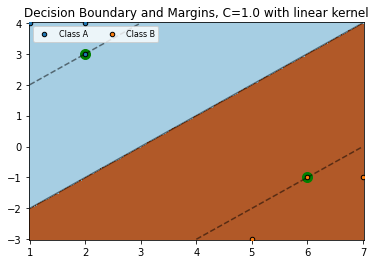

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]


In [6]:
### WRITE YOUR CODE HERE
# 1. Declare a SVC with C=1.0 and kernel='linear'
clf = SVC(C=1.0 , kernel='linear')

# 2. use X and Y to fit the model
clf.fit(X,Y)

# 3. We show the fitted model
plot(X, Y, clf)

# Some information we can extract from the model
# Take note of them as you might need them in the future!
print('w = ', clf.coef_)
print('w0 = ', clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)

In this case, we found that we have 2 **support vectors**, one in each class. They are shown highlighed in green in the plot. A support vector is a data sample that is either on the margin or within the margin (or misclassified). 

Let's inspect the result of the classification. We do the classification in the following way:

$$ 
y_i = \begin{cases}
-1 & \text{if} \ \mathbf{x}_i^T \mathbf{w} + w_0 < 0\\
1 & \text{otherwise}
\end{cases}
$$

*Note*: when doing this on multiple data points at a time, $X$ is an $N\times D$ matrix.

In [7]:
# Use the weights (w) from the fitted model to predict the labels of input data points
def raw_predict(X, w, w0):
    '''
    Given input data X, SVM weight w and w0, output the prediction result.
    
    Args:
        X: data, array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
        w: weights, array of shape (D,)
        w0: bias, array of shape (1,)
    Returns:
        out: predictions, array of shape (N,)
    '''
    ### WRITE YOUR CODE HERE
    my_y_pred=np.zeros(len(Y))
    w =clf.coef_
    w0 =clf.intercept_
    
    my_y_pred=[]
    for i in (np.inner(X,w) + w0):
      if i < 0:
        my_y_pred.append(-1)
      else:
        my_y_pred.append(1)
    
    out = np.array(my_y_pred)
    return out.astype(int)

x_test = np.array([
    [4, 2],
    [ 6, -3]
])

### WRITE YOUR CODE HERE: Use your implementation to do the prediction on the test data.
raw_pred = raw_predict(x_test,  clf.coef_ , clf.intercept_ )
print("Prediction from your implementation: ", raw_pred)

### WRITE YOUR CODE HERE: Use scikit-learn's predict function to do the prediction on the test data.
model_predict = clf.predict(x_test)

print("Prediction from the model: ", model_predict)

assert np.isclose(raw_pred, model_predict).all(), "Your implementation is not correct."


Prediction from your implementation:  [-1  1]
Prediction from the model:  [-1  1]


Now, let us determine the indices of the support vectors. (Reminder: These are the data samples that fall on the margin or within the margin). 

In [8]:
## We can also calculate the decision function manually.

## Step 1
### WRITE YOUR CODE HERE: Code the decision function: Xw + w_0
decision_function = np.inner(X,clf.coef_ ) + clf.intercept_
decision_function=decision_function.reshape(6,)
## Step 2: We can also retrieve the decision function from the model:
decision_function_from_model = clf.decision_function(X)

assert np.isclose(decision_function, decision_function_from_model).all(), "Your implementation is not correct."

# What condition do the support vectors satisfy? 
# Remember that the support vectors are the points that on to the decision boundary, or within the margin.
### WRITE YOUR CODE HERE, hint: look into np.nonzero
a=np.absolute(decision_function)-1
l=[]
for i in range(0,len(a)):
    if a[i]==0:
      l.append(i)

support_vector_indices = np.array(l)

print('I find the indices of support vectors = ', support_vector_indices)
assert np.isclose(support_vector_indices, clf.support_).all(), "Your implementation is not correct."

I find the indices of support vectors =  [2 3]


## 2.2 Different C values

Let's explore the effect of $C$ on a different dataset.

**Q.** How do you expect the margin to vary with C? *Hint*: have a look at the optimization formulation above.

**A.** 

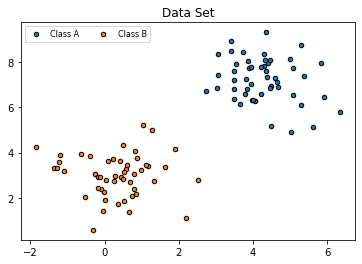

In [9]:
# Get the simple dataset
X, Y = get_simple_dataset()
plot(X, Y, None, dataOnly=True)

In the code below, vary the C value from 0.001 to 10 and pay attention to the changes.

The plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyond the limits of the axis, they might not be shown.

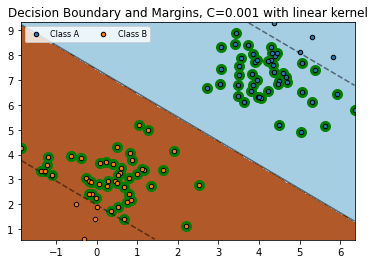

In [10]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
clf = SVC(C=0.001, kernel='linear')

# Call the fit method
clf.fit(X, Y)

# Plot the decision boundary
plot(X, Y, clf)


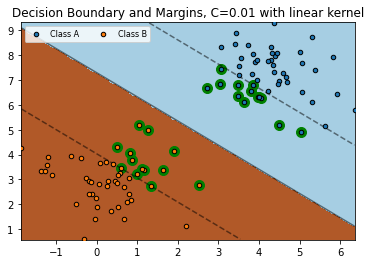

In [11]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
clf = SVC(C=0.01, kernel='linear')

# Call the fit method
clf.fit(X, Y)

# Plot the decision boundary
plot(X, Y, clf)

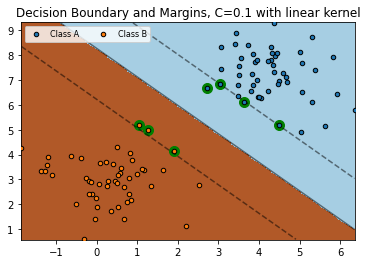

In [12]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
clf = SVC(C=0.1, kernel='linear')

# Call the fit method
clf.fit(X, Y)

# Plot the decision boundary
plot(X, Y, clf)

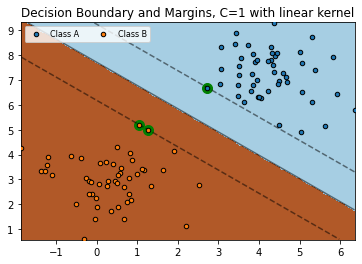

In [13]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
clf = SVC(C=1, kernel='linear')

# Call the fit method
clf.fit(X, Y)

# Plot the decision boundary
plot(X, Y, clf)

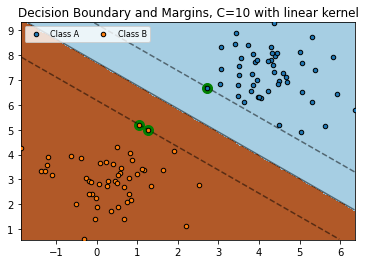

In [14]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
clf = SVC(C=10, kernel='linear')

# Call the fit method
clf.fit(X, Y)

# Plot the decision boundary
plot(X, Y, clf)

### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)

# 3 Kernel SVM

Beyond the linear problem we discussed before, SVM can also solve non-linear classification problem by doing some feature expansion on the input data. 

We replace $\mathbf{x}_i$ with $\phi(\mathbf{x}_i)$, and then $\mathbf{x}_i^\top\mathbf{x}_j$ with $\phi(\mathbf{x}_i)^\top\phi(\mathbf{x}_j)=k(\mathbf{x}_i,\mathbf{x}_j)$. 

$\phi(\cdot)$ is the (possibly unknown) feature expansion function, and $k(\cdot)$ is the kernel function.

The **dual form** of this problem is given by:

$$
\begin{align}
    \underset{\{\lambda_i\}}{\operatorname{max}} \ \ 
    & \sum_{n=1}^N \lambda_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jt_it_jk(\mathbf{x}_i,\mathbf{x}_j)  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \lambda_it_i = 0 \\
                 & \ \ 0 \leq \lambda_i \leq C, \forall i \ \ 
\end{align}
$$

**Q.** 
1. How can you write $\mathbf{w}$ using $\lambda_i$ and function $\phi$?
2. How is $y(\mathbf{x})$ represented using $\lambda_i$?
 
**A.**
...

We continue with the Scikit-Learn implementation of [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The main parameters you should look for are:
- Kernel Functions: `kernel`. Linear, Polynomial and RBF ($X$ is the data)
    - Linear: `linear`. $\langle X, X' \rangle $.
    - Polynomial: `poly`. $( \gamma \langle X, X' \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`.
    - RBF: `rbf`. $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, must be greater than 0.
- Penalty term, `C`: for all
- `gamma`: for Polynomial and RBF kernel (mostly RBF)
- `degree`: for Polynomial kernel


## 3.1 Non-linearly separable data

We use a binary dataset that cannot be separated linearly in the original feature space.

Then, we'll try the different kernel and explore how their parameters affect the results.

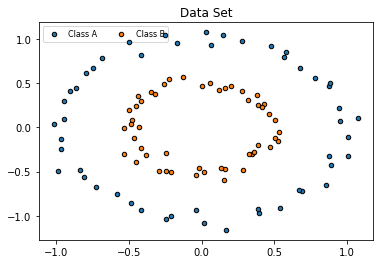

In [15]:
# Load data
X, Y = get_circle_dataset()
plot(X, Y, None, dataOnly=True)

## 3.2 Linear SVM

As you should expect, linear SVM does not perform well in this case.

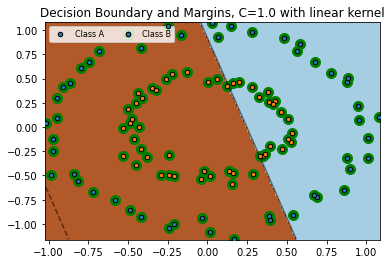

In [16]:
# Use SVM with linear kernel
clf_linear = SVC(kernel='linear', C=1.0)
    
clf_linear.fit(X, Y)
plot(X, Y, clf_linear)

## 3.3 Polynomial SVM

For polynomial SVM, we have two options:
1. We can explicitely write a polynomial feature expansion $\phi_\text{poly}(\cdot)$ to edit the data $X$, then use linear SVM on it.
2. We use the kernel trick to only define a kernel function $k_\text{poly}(\cdot,\cdot)$, which is directly used in SVM.

Let's do both and compare the results!

Fill in the function `expand_X()` that performs polynomial feature expansion. 
You should add a bias term, but **omit the interaction terms**. An example:

For $D=2$ and $\text{degree}=3$, the data
$$
\mathbf{x}_i = \begin{bmatrix}\mathbf{x}_i^{(0)}& \mathbf{x}_i^{(1)}\end{bmatrix},
$$
after the polynomial feature expansion, will become
$$ 
\mathbf{\phi}(\mathbf{x}_i) = \begin{bmatrix}\mathbf{1} & \mathbf{x}_i^{(0)} & \mathbf{x}_i^{(1)} & (\mathbf{x}_i^{(0)})^2 & (\mathbf{x}_i^{(1)})^2 & (\mathbf{x}_i^{(0)})^3 & (\mathbf{x}_i^{(1)})^3 \end{bmatrix}.
$$

In [17]:
# Perform degree-d polynomial feature expansion of input data X
def expand_X(X, degree):
    """
    Polynomial feature expansion with bias but omitting interaction terms
    
    Args:
        X (array): data, shape (N, D).
        degree (int): The degree of the polynomial feature expansion.
    Returns:
        expanded_X (array): Expanded data with shape (N, new_D), 
                               where new_D = D * degree + 1
    """
    ### WRITE YOUR CODE HERE
    expanded_X=[]
    for j in range(0,len(X)):
      a=X[j]
      m=np.array([1])
      for i in range(1,degree+1):
          m=np.append(m,a**i, axis=0)    
      expanded_X.append(m)

    expanded_X=np.array(expanded_X)  
    return expanded_X

The original data has 2 features.
After degree-2 polynomial feature expansion (with bias, without interaction terms) the data has 5 features.


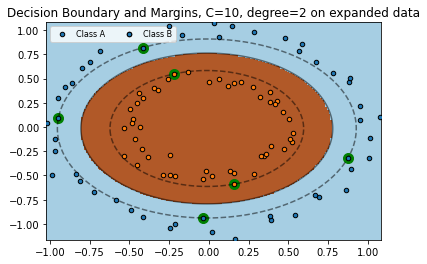

In [18]:
# Polynomial SVM
degree = 2 # you can play with the degree. How does the decision boundary change?

## Do polynomial feature expansion
### WRITE YOUR CODE HERE
expanded_X = expand_X(X, degree)

print("The original data has {} features.".format(X.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(degree,expanded_X.shape[1]))

## Use SVM with linear kernel on expanded data
### WRITE YOUR CODE HERE: you can play with C
expanded_clf = SVC(C=10 , kernel='linear')
expanded_clf.fit(expanded_X , Y)

plot_expand(X, Y, expanded_clf, degree=degree)

The non-linearly separable dataset can now be classified correctly by a linear SVM, thanks to the polynomial feature expansion.

Let's now directly use the polynomial kernel function in SVM.

Given data $\mathbf{X}$ with $N$ samples, its kernel matrix $\mathbf{K}$ is the $N \times N$ symmetric Gram matrix with elelments 

$$ \mathbf{K}_{n,m} = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m) = k(\mathbf{x}_n, \mathbf{x}_m) $$

The polynomial kernel is SVM is written as:
- poly: $( \gamma \langle \mathbf{X}, \mathbf{X'} \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`,
   
where $X$ is the data.

Note that $\phi$ **does not appear explicitly** in the kernel functions!

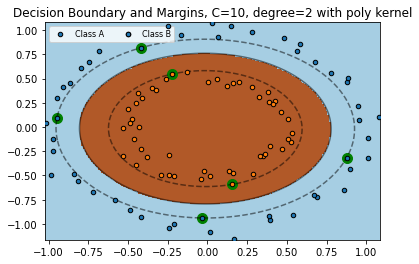

In [19]:
# Use SVM with poly kernel
### WRITE YOUR CODE HERE and PLAY with C, degree and coef0 parameters
clf_poly = SVC(C=10 , kernel='poly' , degree=2 , coef0=10)
    
clf_poly.fit(X, Y)
plot(X, Y, clf_poly)

**Q.** 
1. What are the differences between polynomial feature expansion and polynomial kernel function? 

2. Is the SVM trained with linear kernel on polynomially expanded data same as the SVM trained with polynomial kernel function on original data? 

**A.** 
1. In polynomial feature expansion there is no gamma and r (coef0) to be tuned. 

2. It depends on the values of other parameters (gamma and r (coef0)). If chosen properly, they could be the same.

## 3.4 RBF SVM

Finally, let's try the Radial Basis Function (RBF) kernel:
* `rbf`: $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, and must be greater than 0.

$\gamma$ is a form of scaling factor for the distance between points. If it is increased, then the exponential decays faster with distance, and vice-versa. 

Try different values of $\gamma$ below, e.g., in the range $[0.01, 100]$, and see how the decision function is affected.

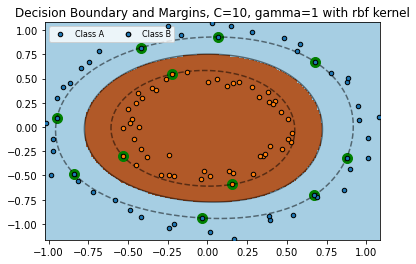

In [20]:
# Use SVM with rbf kernel
### WRITE YOUR CODE HERE and PLAY with C and gamma parameters
clf_rbf = SVC(C=10 , kernel='rbf' , gamma=1)
    
clf_rbf.fit(X, Y)
plot(X, Y, clf_rbf)

### Choosing a kernel

We have seen how to use SVM for classification as a linear classifier, and then how to extend it to non-linearly separable data through the use of kernel functions.

But in practice, **how does one choose which kernel to use and its hyperparameters?**

You guessed it $\rightarrow$ by using a validation set! 

While in this exercise we have only tested SVM on the training data to visualize the effect of the different hyperparameters and kernels, on real problems we would also use validation data to evaluate the performance of the classifier.